+--------------------+
| Routing table for Router A  |
+--------------------+
| Destination | Distance |
+-------------+----------+
| A           | 0        |
| B           | 1        |
| C           | 1        |
| D           | 2        |
+-------------+----------+

+--------------------+
| Routing table for Router B  |
+--------------------+
| Destination | Distance |
+-------------+----------+
| A           | 1        |
| B           | 0        |
| C           | 1        |
| D           | 1        |
+-------------+----------+

+--------------------+
| Routing table for Router C  |
+--------------------+
| Destination | Distance |
+-------------+----------+
| A           | 1        |
| B           | 1        |
| C           | 0        |
| D           | 1        |
+-------------+----------+

+--------------------+
| Routing table for Router D  |
+--------------------+
| Destination | Distance |
+-------------+----------+
| A           | 2        |
| B           | 1        |
| C       

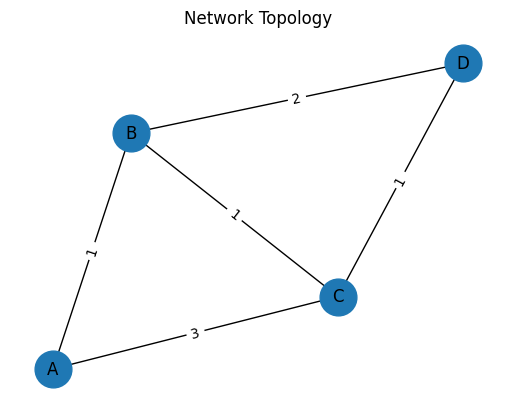

In [9]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

class Router:
    def __init__(self, name, neighbors):
        self.name = name
        self.neighbors = neighbors
        self.routing_table = {neighbor: (1 if neighbor in neighbors else np.inf) for neighbor in all_routers}
        self.routing_table[self.name] = 0  # Distance to itself is 0

    def update_routing_table(self, neighbor, distance_vector):
        for router, distance in distance_vector.items():
            if router != self.name and distance < self.routing_table[router]:
                self.routing_table[router] = distance + self.routing_table[neighbor]

def visualize_network(routers):
    G = nx.Graph()
    for router in routers:
        for neighbor, weight in router.neighbors.items():
            G.add_edge(router.name, neighbor, weight=weight)
    pos = nx.spring_layout(G)  # Positions for all nodes

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=700)

    # Draw edges
    nx.draw_networkx_edges(G, pos)

    # Draw edge labels
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Draw node labels
    nx.draw_networkx_labels(G, pos)

    plt.title("Network Topology")
    plt.axis("off")
    plt.show()

def print_routing_tables(routers):
    for router in routers:
        print(f"+{'-' * 20}+")
        print(f"| Routing table for Router {router.name: <2} |")
        print(f"+{'-' * 20}+")
        print(f"| Destination | Distance |")
        print(f"+-------------+----------+")
        for destination, distance in router.routing_table.items():
            print(f"| {destination: <11} | {distance: <8} |")
        print(f"+-------------+----------+\n")

# Define all routers and their neighbors
all_routers = ["A", "B", "C", "D"]
router_A = Router("A", {"B": 1, "C": 3})
router_B = Router("B", {"A": 1, "C": 1, "D": 2})
router_C = Router("C", {"A": 3, "B": 1, "D": 1})
router_D = Router("D", {"B": 2, "C": 1})

# Define initial routing tables
routers = [router_A, router_B, router_C, router_D]

# Initial routing table exchange
for router in routers:
    for neighbor in router.neighbors:
        neighbor_router = next(r for r in routers if r.name == neighbor)
        neighbor_router.update_routing_table(router.name, router.routing_table)

# Simulate routing table updates (iteration 2)
router_B.routing_table["D"] = 1  # Simulate a change in router B's routing table
router_B.update_routing_table("D", {"D": 1})

# Print routing tables after updates
print_routing_tables(routers)

# Visualize the network
visualize_network(routers)


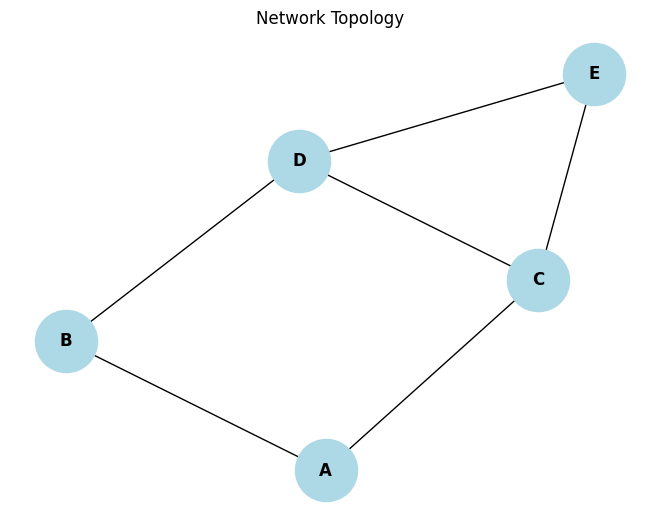

Routing table for Router A:
+---------------+------------+
| Destination   |   Distance |
+===============+============+
| A             |          0 |
+---------------+------------+
| B             |          1 |
+---------------+------------+
| C             |          1 |
+---------------+------------+
| D             |          2 |
+---------------+------------+

Routing table for Router B:
+---------------+------------+
| Destination   |   Distance |
+===============+============+
| A             |          1 |
+---------------+------------+
| B             |          0 |
+---------------+------------+
| C             |          1 |
+---------------+------------+
| D             |          1 |
+---------------+------------+

Routing table for Router C:
+---------------+------------+
| Destination   |   Distance |
+===============+============+
| A             |          1 |
+---------------+------------+
| B             |          1 |
+---------------+------------+
| C            

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
from tabulate import tabulate

class Router:
    def __init__(self, name, neighbors):
        self.name = name
        self.neighbors = neighbors
        self.routing_table = {neighbor: (1 if neighbor in neighbors else float('inf')) for neighbor in all_routers}
        self.routing_table[self.name] = 0  # Distance to itself is 0

    def update_routing_table(self, neighbor, distance_vector):
        for router, distance in distance_vector.items():
            if router != self.name and distance < self.routing_table[router]:
                self.routing_table[router] = distance + self.routing_table[neighbor]

def print_routing_tables(routers):
    for router in routers:
        table = [["Destination", "Distance"]]
        for destination, distance in router.routing_table.items():
            table.append([destination, distance])
        print(f"Routing table for Router {router.name}:")
        print(tabulate(table, headers="firstrow", tablefmt="grid"))
        print()

# Define all routers and their neighbors
all_routers = ["A", "B", "C", "D"]
router_A = Router("A", {"B": 1, "C": 3})
router_B = Router("B", {"A": 1, "C": 1, "D": 2})
router_C = Router("C", {"A": 3, "B": 1, "D": 1})
router_D = Router("D", {"B": 2, "C": 1})

# Define initial routing tables
routers = [router_A, router_B, router_C, router_D]

# Create network graph
G = nx.Graph()
edges = [("A", "B"), ("A", "C"), ("B", "D"), ("C", "D"), ("C", "E"), ("D", "E")]
G.add_edges_from(edges)

# Plot network graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=12, font_weight='bold')
plt.title('Network Topology')
plt.show()

# Initial routing table exchange
for router in routers:
    for neighbor in router.neighbors:
        neighbor_router = next(r for r in routers if r.name == neighbor)
        neighbor_router.update_routing_table(router.name, router.routing_table)

# Simulate routing table updates (iteration 2)
router_B.routing_table["D"] = 1  # Simulate a change in router B's routing table
router_B.update_routing_table("D", {"D": 1})

# Print routing tables after updates
print_routing_tables(routers)


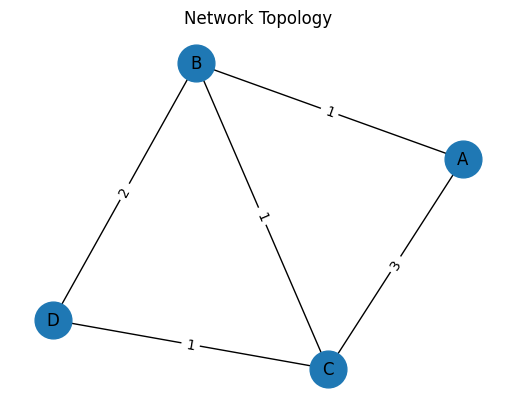

Routing table for Router A:
╒═══════════════╤════════════╕
│ Destination   │   Distance │
╞═══════════════╪════════════╡
│ A             │          0 │
├───────────────┼────────────┤
│ B             │          1 │
├───────────────┼────────────┤
│ C             │          1 │
├───────────────┼────────────┤
│ D             │          2 │
╘═══════════════╧════════════╛

Routing table for Router B:
╒═══════════════╤════════════╕
│ Destination   │   Distance │
╞═══════════════╪════════════╡
│ A             │          1 │
├───────────────┼────────────┤
│ B             │          0 │
├───────────────┼────────────┤
│ C             │          1 │
├───────────────┼────────────┤
│ D             │          1 │
╘═══════════════╧════════════╛

Routing table for Router C:
╒═══════════════╤════════════╕
│ Destination   │   Distance │
╞═══════════════╪════════════╡
│ A             │          1 │
├───────────────┼────────────┤
│ B             │          1 │
├───────────────┼────────────┤
│ C            

In [11]:
import numpy as np
from tabulate import tabulate
import networkx as nx
import matplotlib.pyplot as plt

class Router:
    def __init__(self, name, neighbors):
        self.name = name
        self.neighbors = neighbors
        self.routing_table = {neighbor: (1 if neighbor in neighbors else np.inf) for neighbor in all_routers}
        self.routing_table[self.name] = 0  # Distance to itself is 0

    def update_routing_table(self, neighbor, distance_vector):
        for router, distance in distance_vector.items():
            if router != self.name and distance < self.routing_table[router]:
                self.routing_table[router] = distance + self.routing_table[neighbor]

def visualize_network(routers):
    G = nx.Graph()
    for router in routers:
        for neighbor, weight in router.neighbors.items():
            G.add_edge(router.name, neighbor, weight=weight)
    pos = nx.spring_layout(G)  # Positions for all nodes

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=700)

    # Draw edges
    nx.draw_networkx_edges(G, pos)

    # Draw edge labels
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Draw node labels
    nx.draw_networkx_labels(G, pos)

    plt.title("Network Topology")
    plt.axis("off")
    plt.show()

def print_routing_tables(routers):
    for router in routers:
        table = [["Destination", "Distance"]]
        for destination, distance in router.routing_table.items():
            table.append([destination, distance])
        print(f"Routing table for Router {router.name}:")
        print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))
        print()

# Define all routers and their neighbors
all_routers = ["A", "B", "C", "D"]
router_A = Router("A", {"B": 1, "C": 3})
router_B = Router("B", {"A": 1, "C": 1, "D": 2})
router_C = Router("C", {"A": 3, "B": 1, "D": 1})
router_D = Router("D", {"B": 2, "C": 1})

# Define initial routing tables
routers = [router_A, router_B, router_C, router_D]

# Initial routing table exchange
for router in routers:
    for neighbor in router.neighbors:
        neighbor_router = next(r for r in routers if r.name == neighbor)
        neighbor_router.update_routing_table(router.name, router.routing_table)

# Simulate routing table updates (iteration 2)
router_B.routing_table["D"] = 1  # Simulate a change in router B's routing table
router_B.update_routing_table("D", {"D": 1})

# Visualize the network
visualize_network(routers)

# Print routing tables after updates
print_routing_tables(routers)
